In [16]:
#import mo
import numpy as np
import scipy as sp

In [17]:
#initialize data, perform linear regression

#define constants
n = 30
samples = 50000
d = 1
mu = 0
sigma_2 = 5
sigma = np.sqrt(sigma_2)

#create matrices for storing relevant data
x = np.zeros(n)
y = np.zeros(n)

#create matrices for variance estimate data 
noise_variance = np.zeros(samples)
sample_variance = np.zeros(samples)
population_variance = np.zeros(samples)

#compute regression, noise variance, sample variance of noise, and population variance of noise 
for j in range(samples): 
    
    # initialize data
    random = np.random.uniform(0,1)
    noise = sigma*np.random.randn(n)
    x = np.random.rand(n)
    y = 36 * x + noise
    
    # create design matrix
    X = np.vstack([np.ones(n), x]).T
    
    # perform regression
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    
    #compute noise variance 
    m_RSS = (y - X @ w)**2
    noise_variance[j] = sum(m_RSS) / (n - d - 1)
    
    #compute sample variance of noise
    m_sample_variance = (noise - np.average(noise))**2
    sample_variance[j] = sum(m_sample_variance / (n - 1))
    
    #compute population variance of noise
    m_population_variance = (noise - 0)**2
    population_variance[j] = sum(m_population_variance / (n))

In [18]:
#define function to plot variance distribution along with the desired distribution
from matplotlib import pyplot as plt

def plot_distribution(data,scalefactor, dof):
    
    plt.hist(data, 200, density=True)
    values = np.arange(0,20, 0.001)
    plt.plot(values,sp.stats.chi2.pdf(values, df = dof, scale = scalefactor))

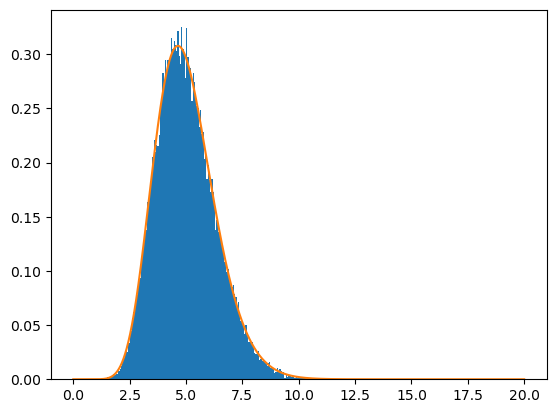

In [19]:
plot_distribution(noise_variance, sigma_2  / (n - d - 1), n - d - 1)

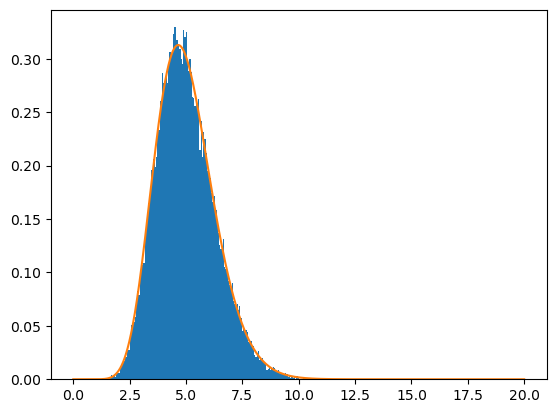

In [20]:
plot_distribution(sample_variance, sigma_2 / (n - 1), n - 1)

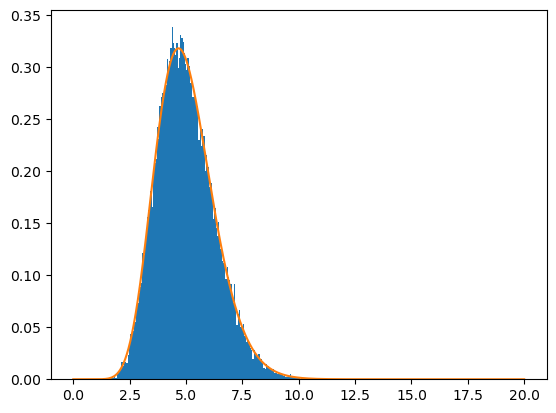

In [21]:
plot_distribution(population_variance, sigma_2 / (n), n)

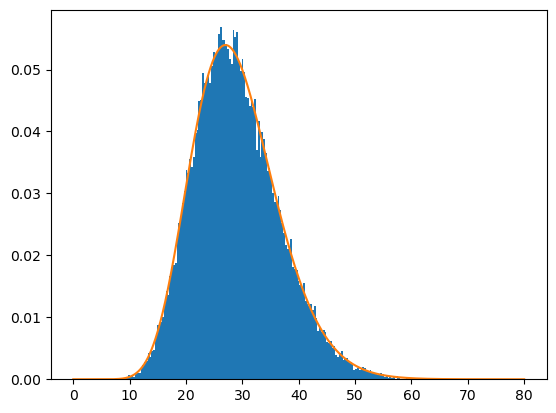

In [22]:
#numerical evidence that the sample variance is distributed by the chi_2 distribution with n - 1 degrees of freedom
import matplotlib.pyplot as plt
plt.hist(sample_variance * ((n-1) / sigma_2), 200, density=True)

values = np.arange(0,80, 0.001)

plt.plot(values,sp.stats.chi2.pdf(values, df = n-1, loc = 0, scale = 1))

5.002934494869821